In [1]:
!pip install opencv-python-headless

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

print("OpenCV version : ", cv2.__version__)

OpenCV version :  4.11.0


이미지 로드 성공
[image 1]


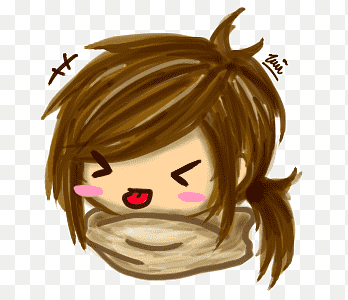

[image 2]


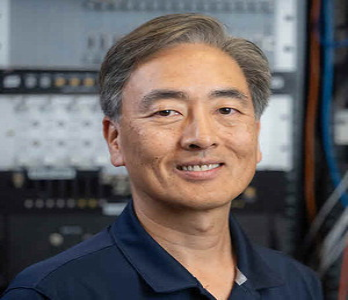

In [10]:
!wget -O image_1.jpg "https://e1.pngegg.com/pngimages/17/216/png-clipart-chiaro-emot-icon-300x300-bweek-thumbnail.png" -q
!wget -O image_2.png "https://pimg.mk.co.kr/news/cms/202501/13/20250113_01160106000001_S00.jpg" -q

image_1 = cv2.imread("image_1.jpg")
image_2 = cv2.imread("image_2.png")

if image_1 is None or image_2 is None:
  print("이미지 로드 실패")
else:
  print("이미지 로드 성공")
  if image_1.shape != image_2.shape:
    image_2 = cv2.resize(image_2, (image_1.shape[1], image_1.shape[0]))

  print("[image 1]")
  cv2_imshow(image_1)
  print("[image 2]")
  cv2_imshow(image_2)


[Saturation 연산 결과 : cv2.add]


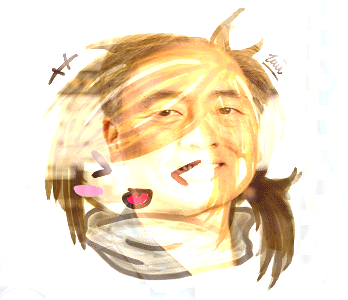

[Modulo 연산 결과 : image_1 + image_2]


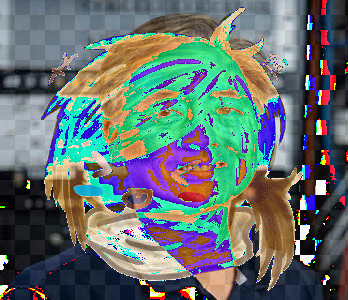

In [11]:
if image_1 is not None and image_2 is not None:
  result_saturation = cv2.add(image_1, image_2)
  print("[Saturation 연산 결과 : cv2.add]")
  cv2_imshow(result_saturation)

  result_modulo = image_1 + image_2
  print("[Modulo 연산 결과 : image_1 + image_2]")
  cv2_imshow(result_modulo)
else:
  print("이미지를 불러오지 못했습니다")

# **Alpha blending(가중치 기반 합성)

gamma = 노이즈떄문에 사용, 연산 결과에 추가로 더할 값(주로 0으로 사용)


[Alpha Blending : 0.7 vs 0.3]


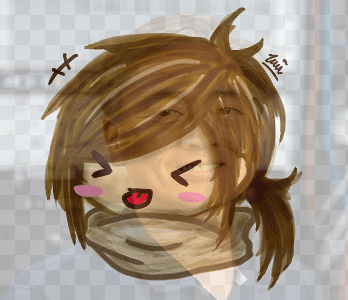

In [17]:
if image_1 is not None and image_2 is not None:
  blended = cv2.addWeighted(
      image_1, 0.7,
      image_2, 0.3,
      0 #gamma
  )
  print("[Alpha Blending : 0.7 vs 0.3]")
  cv2_imshow(blended)
else:
  print("이미지를 불러오지 못했습니다")

# **마스크 기반 합성**

[마스크 기반 합성]


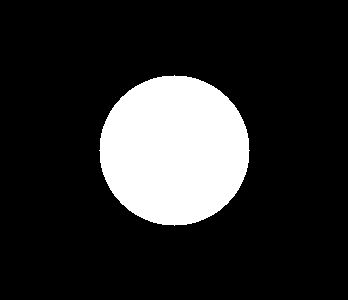

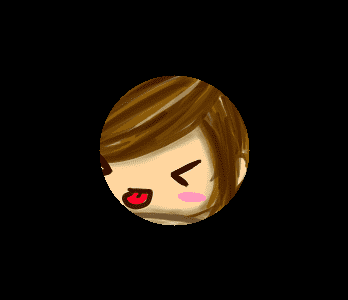

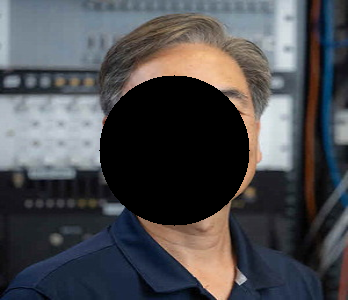

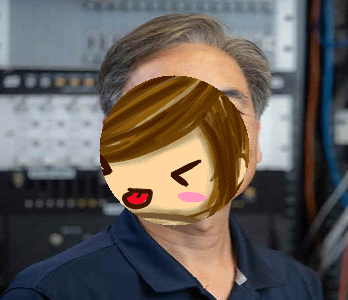

In [22]:
if image_1 is not None and image_2 is not None:
  h, w = image_1.shape[:2]

  mask= np.zeros((h, w), dtype = np.uint8)
  center = (w//2, h//2)
  radius = min(h, w)//4
  cv2.circle(mask, center, radius, 255, -1)

  mask_3channel = cv2.merge([mask, mask, mask])

  image_1_masked = cv2.bitwise_and(image_1, mask_3channel)

  mask_inv = cv2.bitwise_not(mask_3channel)

  image_2_background = cv2.bitwise_and(image_2, mask_inv)

  combined = cv2.add(image_1_masked, image_2_background)

  print("[마스크 기반 합성]")
  cv2_imshow(mask_3channel)
  cv2_imshow(image_1_masked)
  cv2_imshow(image_2_background)
  cv2_imshow(combined)

# **과제**

want
비율 1 : 1
비율 2): 2
[Blended Result]


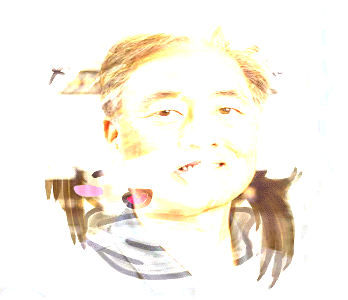

In [29]:
# 두이미지의 크기가 다를 때, 자동으로 크기를 맞추거나 원하는 비율로 합성하기
if image_1 is not None and image_2 is not None:
  select = input()
  if select == "auto":
    if image_1.shape != image_2.shape:
      image_2 = cv2.resize(image_2, (image_1.shape[1], image_1.shape[0]))
    print("[자동 조정]")
    cv2_imshow(image_2)
    result = cv2.addWeighted(image_1, 0.5, image_2, 0.5, 0)

  elif select == "want":
    ratio1 = float(input("비율 1 : "))
    ratio2 = float(input("비율 2): "))

    if image_1.shape != image_2.shape:
      image_2 = cv2.resize(image_2, (image_1.shape[1], image_1.shape[0]))

    result = cv2.addWeighted(image_1, ratio1, image_2, ratio2, 0)

  else:
    print("이상값")
    result = None

  if result is not None:
    print("[Blended Result]")
    cv2_imshow(result)
else:
  print("이미지 로드 싫패")


0.3
[Alpha Blending : 0.7 vs 0.3]


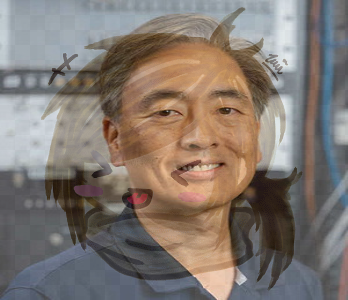

In [31]:
#alpha blending에서 가중치를 사용자 입력으로 받아 합성
if image_1 is not None and image_2 is not None:
  a = float(input())
  blended = cv2.addWeighted(
      image_1, a,
      image_2, 1-a,
      0 #gamma
  )
  print("[Alpha Blending : 0.7 vs 0.3]")
  cv2_imshow(blended)
else:
  print("이미지를 불러오지 못했습니다")

[마스크 기반 합성]


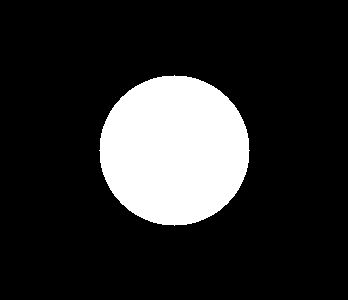

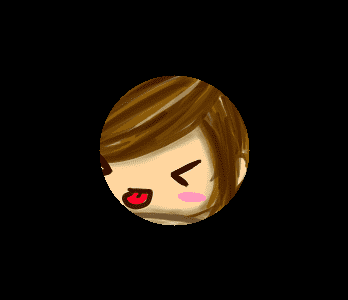

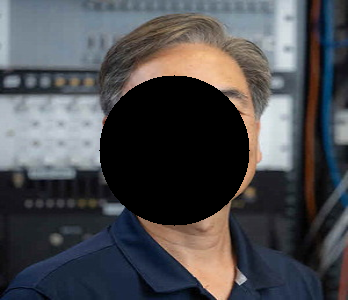

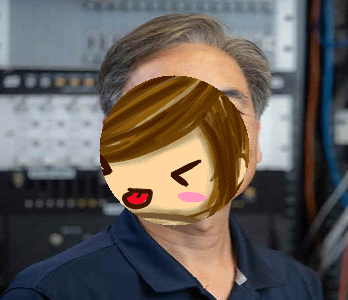

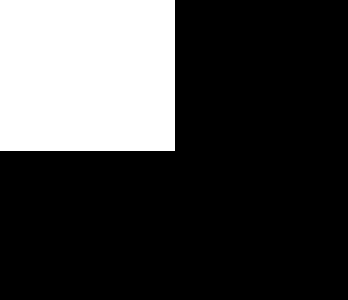

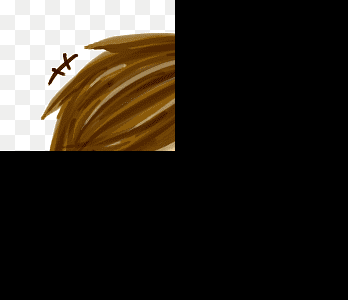

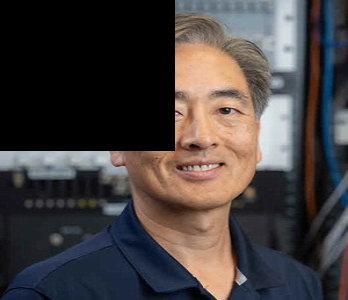

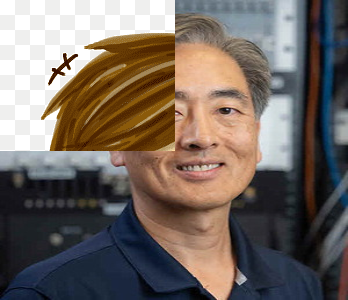

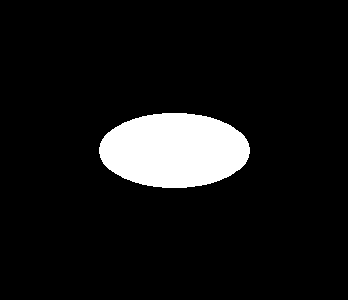

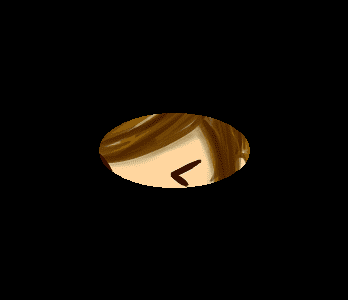

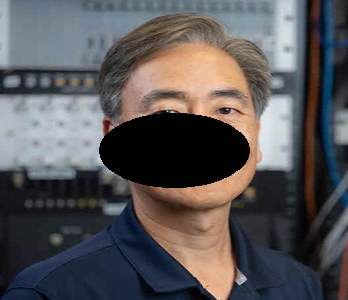

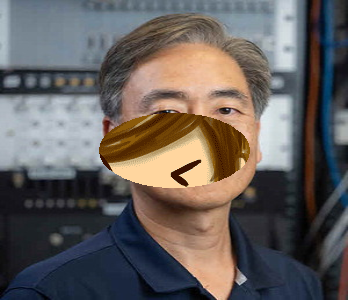

In [48]:
#마스크를 활용한 다양한 합성
if image_1 is not None and image_2 is not None:
  h, w = image_1.shape[:2]
  h1, w1 = image_1.shape[:2]
  h2, w2 = image_1.shape[:2]


  mask= np.zeros((h, w), dtype = np.uint8)
  mask1= np.zeros((h1, w1), dtype = np.uint8)
  mask2= np.zeros((h2, w2), dtype = np.uint8)

  center = (w//2, h//2)
  radius = min(h, w)//4
  cv2.circle(mask, center, radius, 255, -1)
  cv2.rectangle(mask1, (0, 0), (w // 2, h // 2), 255, -1)
  cv2.ellipse(mask2, center, (radius, radius // 2), 0, 0, 360, 255, -1)

  mask_3channel1 = cv2.merge([mask, mask, mask])
  mask_3channel2 = cv2.merge([mask1, mask1, mask1])
  mask_3channel3 = cv2.merge([mask2, mask2, mask2])

  image_1_masked = cv2.bitwise_and(image_1, mask_3channel1)
  image_1_masked1 = cv2.bitwise_and(image_1, mask_3channel2)
  image_1_masked2 = cv2.bitwise_and(image_1, mask_3channel3)

  mask_inv = cv2.bitwise_not(mask_3channel1)
  mask_inv1 = cv2.bitwise_not(mask_3channel2)
  mask_inv2 = cv2.bitwise_not(mask_3channel3)


  image_2_background = cv2.bitwise_and(image_2, mask_inv)
  image_2_background1 = cv2.bitwise_and(image_2, mask_inv1)
  image_2_background2 = cv2.bitwise_and(image_2, mask_inv2)

  combined = cv2.add(image_1_masked, image_2_background)
  combined1 = cv2.add(image_1_masked1, image_2_background1)
  combined2 = cv2.add(image_1_masked2, image_2_background2)

  print("[마스크 기반 합성]")
  cv2_imshow(mask_3channel1)
  cv2_imshow(image_1_masked)
  cv2_imshow(image_2_background)
  cv2_imshow(combined)

  cv2_imshow(mask_3channel2)
  cv2_imshow(image_1_masked1)
  cv2_imshow(image_2_background1)
  cv2_imshow(combined1)

  cv2_imshow(mask_3channel3)
  cv2_imshow(image_1_masked2)
  cv2_imshow(image_2_background2)
  cv2_imshow(combined2)


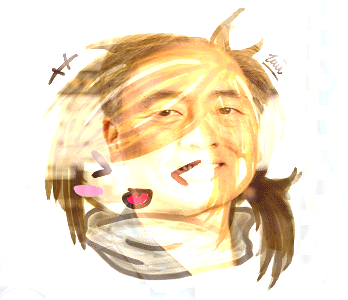

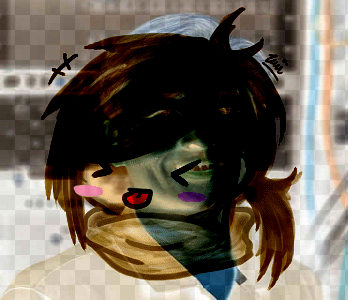

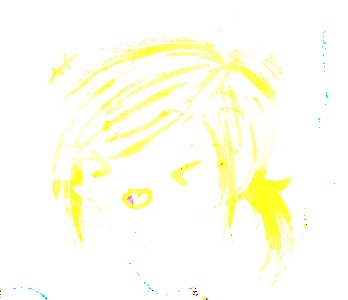

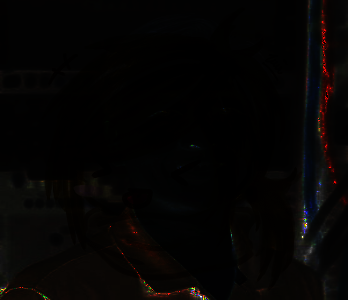

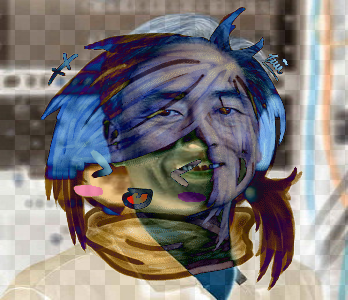

In [37]:
#다양한 산술연산 함수 사용
if image_1 is not None and image_2 is not None:
  result_add = cv2.add(image_1, image_2)
  result_subtract = cv2.subtract(image_1, image_2)
  result_multiply = cv2.multiply(image_1, image_2)
  result_divide = cv2.divide(image_1, image_2)
  result_absdiff = cv2.absdiff(image_1, image_2)
  result_bitwise_and = cv2.bitwise_and(image_1, image_2)

cv2_imshow(result_add)
cv2_imshow(result_subtract)
cv2_imshow(result_multiply)
cv2_imshow(result_divide)
cv2_imshow(result_absdiff)